In [1]:
import os
import math
import re
import numpy as np
import pandas as pd
from omnetpp.scave import results, chart, utils
import matplotlib.pyplot as plt
from itertools import product, chain, combinations
import scipy
from IPython.display import display, HTML
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plotSize = (13, 10)

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    v = np.var(a, ddof=1)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, v, m-h, m+h

In [135]:
results.set_inputs(['../simulations/results/SelfishMining/*.sca', '../simulations/results/HonestMining/*.sca', '../simulations/results/SelfishMiningNoTx/*.sca'])

In [5]:
df = results.get_scalars('run =~ SelfishMining-** AND module =~ BitcoinNetwork.miner[**].app[0] AND name =~ miningEarnings:last AND itervar:H =~ 80', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
df[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.452947e+11,sum(miningEarn),"Mining earnings, last",sat
5,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.053114e+11,sum(miningEarn),"Mining earnings, last",sat
10,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.553045e+11,sum(miningEarn),"Mining earnings, last",sat
15,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.403238e+11,sum(miningEarn),"Mining earnings, last",sat
20,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.653092e+11,sum(miningEarn),"Mining earnings, last",sat
25,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.903184e+11,sum(miningEarn),"Mining earnings, last",sat
30,BitcoinNetwork.miner[0].app[0],miningEarnings:last,8.403605e+11,sum(miningEarn),"Mining earnings, last",sat
35,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.652974e+11,sum(miningEarn),"Mining earnings, last",sat
40,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.502980e+11,sum(miningEarn),"Mining earnings, last",sat
45,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.953031e+11,sum(miningEarn),"Mining earnings, last",sat


In [18]:
data = []
for i in range(0, 5):
    data.append((i,) + mean_confidence_interval(df[df['module'] == 'BitcoinNetwork.miner[' + str(i) + '].app[0]']['value']))

res = pd.DataFrame(data, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
res['percent'] = res['mean'] / res['mean'].sum()
res

,id,mean,var,cimin,cimax,percent
0,0,6.850594e+11,3.601306e+21,6.569735e+11,7.131454e+11,0.536732
1,1,1.468225e+11,1.781251e+21,1.270700e+11,1.665750e+11,0.115033
2,2,1.538278e+11,1.595924e+21,1.351311e+11,1.725245e+11,0.120521
3,3,1.438209e+11,1.991112e+21,1.229372e+11,1.647046e+11,0.112681
4,4,1.468233e+11,1.391419e+21,1.293656e+11,1.642811e+11,0.115033


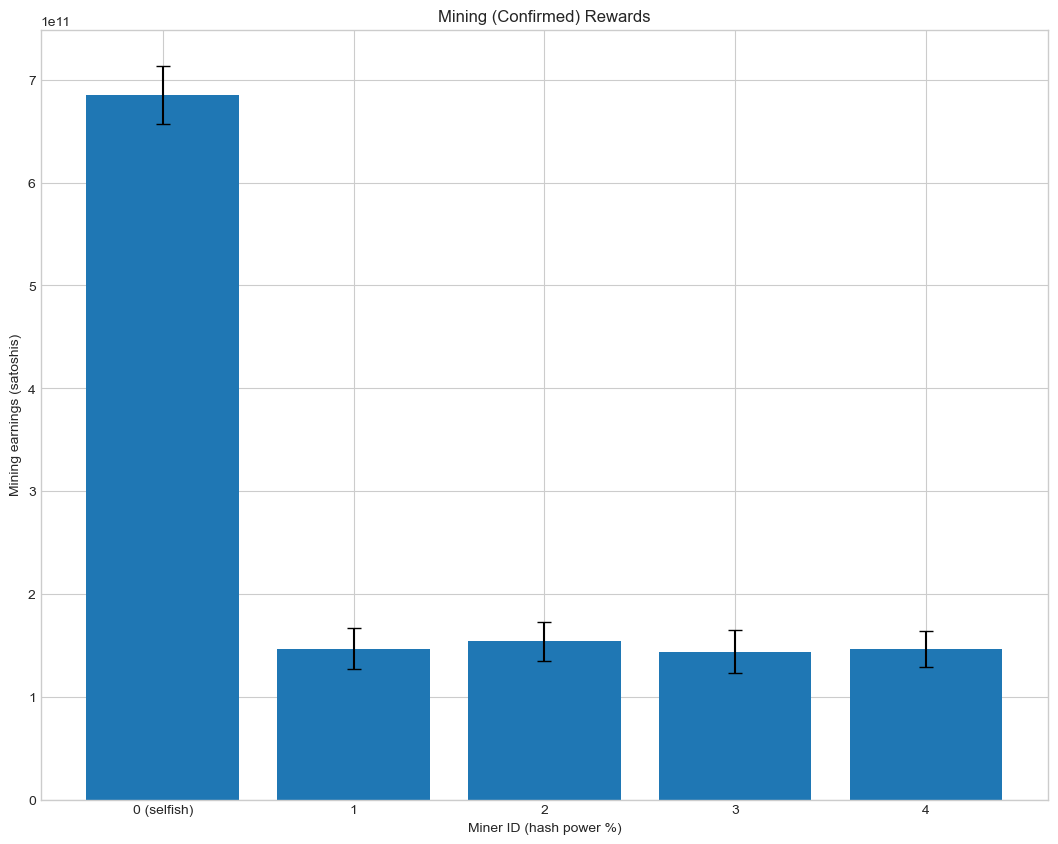

In [7]:
labels = ['0 (selfish)', '1', '2', '3', '4']

means = list(res['mean'])

ci = res[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(res['id'], res['mean'], yerr=y_r, align='center', capsize=5)
plt.xticks(res['id'], labels)

plt.xlabel('Miner ID (hash power %)')
plt.ylabel('Mining earnings (satoshis)')
plt.title('Mining (Confirmed) Rewards')
#plt.savefig('figures/standard-mining-rewards.eps', format='eps')
plt.show()

In [11]:
hdf = results.get_scalars('run =~ HonestMining-** AND module =~ BitcoinNetwork.miner[**].app[0] AND name =~ miningEarnings:last AND itervar:H =~ 80', include_attrs=True, include_fields=True).sort_values(['module', 'name'])
hdf[["module", "name", "value", "source", "title", "unit"]]

,module,name,value,source,title,unit
0,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.503006e+11,sum(miningEarn),"Mining earnings, last",sat
5,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.152825e+11,sum(miningEarn),"Mining earnings, last",sat
10,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.653027e+11,sum(miningEarn),"Mining earnings, last",sat
15,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.803089e+11,sum(miningEarn),"Mining earnings, last",sat
20,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.752642e+11,sum(miningEarn),"Mining earnings, last",sat
25,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.102843e+11,sum(miningEarn),"Mining earnings, last",sat
30,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.852660e+11,sum(miningEarn),"Mining earnings, last",sat
35,BitcoinNetwork.miner[0].app[0],miningEarnings:last,7.052712e+11,sum(miningEarn),"Mining earnings, last",sat
40,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.752685e+11,sum(miningEarn),"Mining earnings, last",sat
45,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.002370e+11,sum(miningEarn),"Mining earnings, last",sat


In [19]:
hdata = []
for i in range(0, 5):
    hdata.append((i,) + mean_confidence_interval(hdf[hdf['module'] == 'BitcoinNetwork.miner[' + str(i) + '].app[0]']['value']))

hres = pd.DataFrame(hdata, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
hres['percent'] = hres['mean'] / hres['mean'].sum()
hres

,id,mean,var,cimin,cimax,percent
0,0,7.035287e+11,2.665855e+21,6.793642e+11,7.276931e+11,0.504031
1,1,1.648156e+11,5.016286e+20,1.543334e+11,1.752977e+11,0.118079
2,2,1.735691e+11,8.746651e+20,1.597277e+11,1.874105e+11,0.124351
3,3,1.778200e+11,5.121555e+20,1.672284e+11,1.884115e+11,0.127396
4,4,1.760698e+11,1.220969e+21,1.597162e+11,1.924233e+11,0.126142


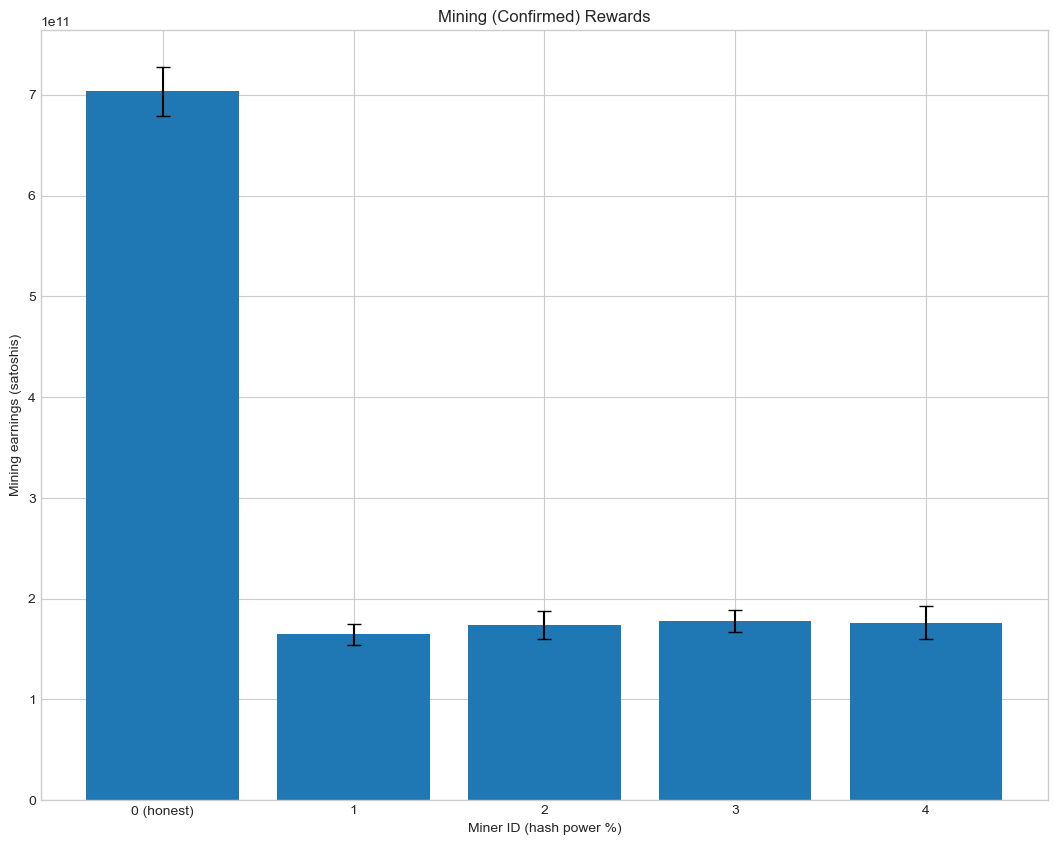

In [13]:
labels = ['0 (honest)', '1', '2', '3', '4']

means = list(hres['mean'])

ci = hres[['cimin', 'cimax']].to_numpy()

y_r = np.c_[means-ci[:,0],ci[:,1]-means ].T

plt.figure(figsize=plotSize)
plt.bar(hres['id'], hres['mean'], yerr=y_r, align='center', capsize=5)
plt.xticks(hres['id'], labels)

plt.xlabel('Miner ID (hash power %)')
plt.ylabel('Mining earnings (satoshis)')
plt.title('Mining (Confirmed) Rewards')
#plt.savefig('figures/standard-mining-rewards.eps', format='eps')
plt.show()

In [232]:
adf = results.get_scalars('run =~ SelfishMining-** AND module =~ BitcoinNetwork.miner[**].app[0] AND name =~ miningEarnings:last', include_attrs=True, include_fields=True, include_itervars=True).sort_values(['H', 'module', 'name'])

In [233]:
hdf = results.get_scalars('run =~ HonestMining-** AND module =~ BitcoinNetwork.miner[**].app[0] AND name =~ miningEarnings:last', include_attrs=True, include_fields=True, include_itervars=True).sort_values(['H', 'module', 'name'])

In [235]:
totals = adf[['runID', 'value']].groupby(['runID']).sum()
for idx, row in adf.iterrows():
    adf.loc[idx, 'total'] = totals.loc[row['runID'], 'value']
adf['relative'] = adf['value'] / adf['total']

In [236]:
totals = hdf[['runID', 'value']].groupby(['runID']).sum()
for idx, row in hdf.iterrows():
    hdf.loc[idx, 'total'] = totals.loc[row['runID'], 'value']
hdf['relative'] = hdf['value'] / hdf['total']

In [237]:
adata = []
hdata = []
perc = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5]
idx = 0
for h in ['8.8888889', '20', '34.2857143', '53.3333333', '65.4545455', '80']:
    adata.append((perc[idx],) + mean_confidence_interval(adf[(adf['H'] == h) & (adf['module'] == 'BitcoinNetwork.miner[0].app[0]')]['relative']))
    hdata.append((perc[idx],) + mean_confidence_interval(hdf[(hdf['H'] == h) & (hdf['module'] == 'BitcoinNetwork.miner[0].app[0]')]['relative']))
    idx += 1
    
ares = pd.DataFrame(adata, columns=['id', 'mean', 'var', 'cimin', 'cimax'])
hres = pd.DataFrame(hdata, columns=['id', 'mean', 'var', 'cimin', 'cimax'])

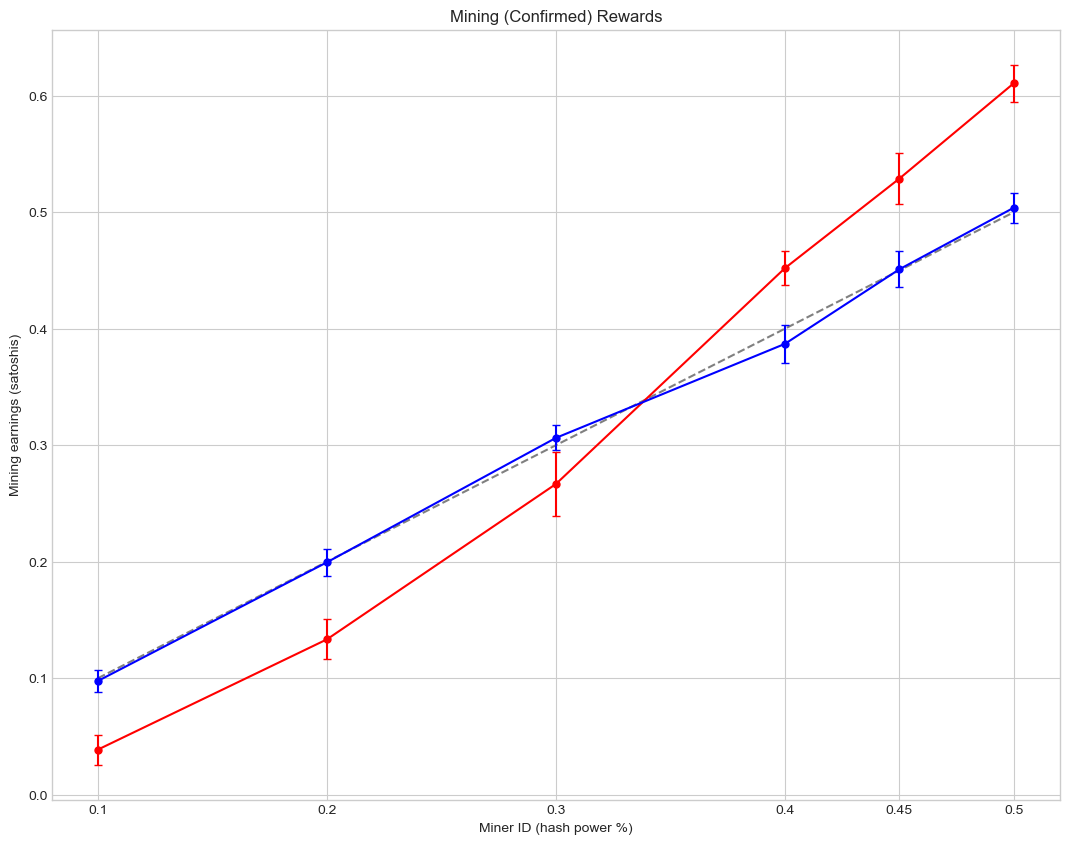

In [238]:
labels = ['0.1', '0.2', '0.3', '0.4', '0.45', '0.5']

ameans = list(ares['mean'])
hmeans = list(hres['mean'])

aci = ares[['cimin', 'cimax']].to_numpy()
hci = hres[['cimin', 'cimax']].to_numpy()

ay_r = np.c_[ameans-aci[:,0],aci[:,1]-ameans ].T
hy_r = np.c_[hmeans-hci[:,0],hci[:,1]-hmeans ].T

plt.figure(figsize=plotSize)
#plt.bar(ares['id'], ares['mean'], yerr=y_r, align='center', capsize=5)
plt.plot(ares['id'], ares['id'], linestyle='dashed', color='grey')
plt.errorbar(x=ares['id'], y=ares['mean'], yerr=ay_r, capsize=3, linestyle='-', marker='.', markersize=10, color='red')
plt.errorbar(x=hres['id'], y=hres['mean'], yerr=hy_r, capsize=3, linestyle='-', marker='.', markersize=10, color='blue')
plt.xticks(ares['id'], labels)

plt.xlabel('Miner ID (hash power %)')
plt.ylabel('Mining earnings (satoshis)')
plt.title('Mining (Confirmed) Rewards')
#plt.savefig('figures/standard-mining-rewards.eps', format='eps')
plt.show()

In [239]:
ares

,id,mean,var,cimin,cimax
0,0.10,0.038721,0.000760,0.025822,0.051620
1,0.20,0.133337,0.001353,0.116121,0.150552
2,0.30,0.266686,0.003347,0.239610,0.293763
3,0.40,0.451947,0.000990,0.437225,0.466670
4,0.45,0.528860,0.002170,0.507061,0.550660
5,0.50,0.610757,0.001160,0.594814,0.626701


In [126]:
adf

,runID,module,name,value,interpolationmode,recordingmode,source,title,unit,H,total,relative
0,SelfishMiningNoTx-100-20241105-17:48:10-8224,BitcoinNetwork.miner[0].app[0],miningEarnings:last,6.109000e+13,sample-hold,last,sum(miningEarn),"Mining earnings, last",sat,80,1.198300e+14,0.509806
1,SelfishMiningNoTx-100-20241105-17:48:10-8224,BitcoinNetwork.miner[1].app[0],miningEarnings:last,2.075500e+13,sample-hold,last,sum(miningEarn),"Mining earnings, last",sat,80,1.198300e+14,0.173204
2,SelfishMiningNoTx-100-20241105-17:48:10-8224,BitcoinNetwork.miner[2].app[0],miningEarnings:last,2.061000e+13,sample-hold,last,sum(miningEarn),"Mining earnings, last",sat,80,1.198300e+14,0.171994
3,SelfishMiningNoTx-100-20241105-17:48:10-8224,BitcoinNetwork.miner[3].app[0],miningEarnings:last,8.575000e+12,sample-hold,last,sum(miningEarn),"Mining earnings, last",sat,80,1.198300e+14,0.071560
4,SelfishMiningNoTx-100-20241105-17:48:10-8224,BitcoinNetwork.miner[4].app[0],miningEarnings:last,8.800000e+12,sample-hold,last,sum(miningEarn),"Mining earnings, last",sat,80,1.198300e+14,0.073437


In [127]:
adf['relative']

0    0.509806
1    0.173204
2    0.171994
3    0.071560
4    0.073437
Name: relative, dtype: float64

In [213]:
df = results.get_scalars('run =~ SelfishMining-** AND module =~ BitcoinNetwork.miner[0].blockchainManager AND name =~ attackResult:sum', include_attrs=True, include_fields=True, include_itervars=True).sort_values(['H', 'module', 'name'])

In [218]:
df[["module", "name", "value", "source", "title", "unit", "H"]]

,module,name,value,source,title,unit,H
1,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,11.0,attackResult,"Attack Result, sum",successes,20
17,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,12.0,attackResult,"Attack Result, sum",successes,20
19,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,9.0,attackResult,"Attack Result, sum",successes,20
22,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,10.0,attackResult,"Attack Result, sum",successes,20
27,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,11.0,attackResult,"Attack Result, sum",successes,20
30,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,12.0,attackResult,"Attack Result, sum",successes,20
36,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,8.0,attackResult,"Attack Result, sum",successes,20
38,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,8.0,attackResult,"Attack Result, sum",successes,20
40,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,10.0,attackResult,"Attack Result, sum",successes,20
42,BitcoinNetwork.miner[0].blockchainManager,attackResult:sum,9.0,attackResult,"Attack Result, sum",successes,20


In [219]:
df.groupby(['H'])['value'].mean()

H
20             9.80
34.2857143    14.55
53.3333333    15.30
65.4545455    17.05
8.8888889      3.35
80            16.00
Name: value, dtype: float64

In [216]:
df['value'].max()

22.0

In [217]:
df['value'].min()

0.0